# COMP431 Computer Vision Assignment 2
27/10/2020, Abdullah Gul University
### Name: ???Fill this???

* Do not use Jupyter Notebook. Instead, use JupyterLab. Otherwise TA might not be able to see your answers.
* You are not allowed to manually give any position or draw any shape. The algorithms that you develop should work regardless of the position of the objects.
* You are not allowed to use circle or any other shape finding functions.
* You can use filtering for any purpose such as eliminating the noise. 
* Remember to push your changes to github occasionally (not only commit to your local git server)
* http://www.mazegenerator.net/Examples.aspx 

# Introduction
We have the following images:

In [1]:
#initializations
# if using notebook:
# %matplotlib notebook
# if using jupyterlab:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import platform
import skimage
import scipy
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['image.cmap'] = "gray"
print ("OpenCV version: ", cv2.__version__)
print ("Skimage version: ", skimage.__version__)
print ("Scipy version: ", scipy.__version__)
print ("Matplotlib version: ", matplotlib.__version__)
print ("Python version: ", platform.python_version())

OpenCV version:  4.2.0
Skimage version:  0.16.2
Scipy version:  1.5.0
Matplotlib version:  3.3.1
Python version:  3.8.5


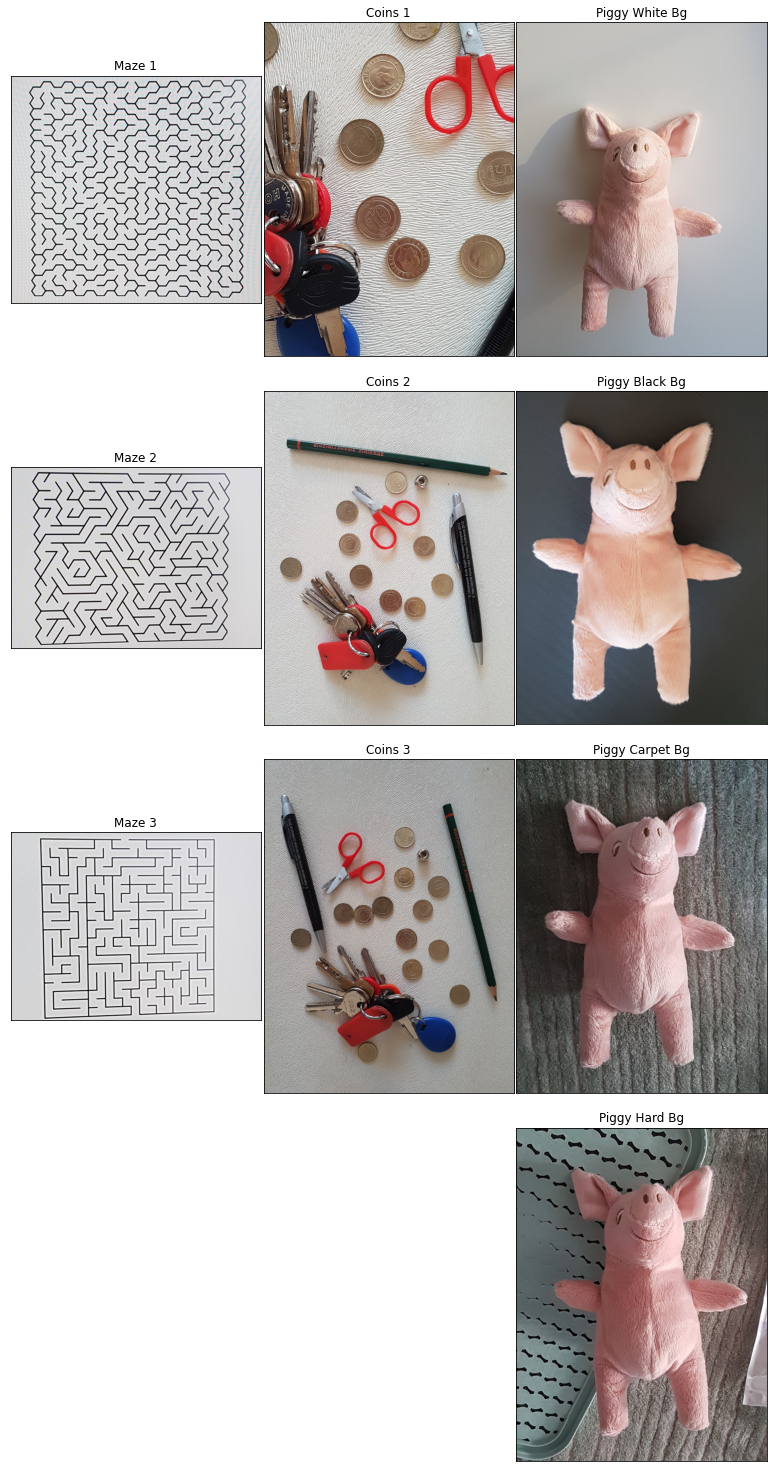

In [2]:
# Loading a sample image
img_maze_1 = cv2.imread('sample_images/maze_1.jpg')[...,::-1]
img_coins_1 = cv2.imread('sample_images/coins_1.jpg')[...,::-1]
img_piggy_white = cv2.imread('sample_images/piggy_white.jpg')[...,::-1]
img_maze_2 = cv2.imread('sample_images/maze_2.jpg')[...,::-1]
img_coins_2 = cv2.imread('sample_images/coins_2.jpg')[...,::-1]
img_piggy_black = cv2.imread('sample_images/piggy_black.jpg')[...,::-1]
img_maze_3 = cv2.imread('sample_images/maze_3.jpg')[...,::-1]
img_coins_3 = cv2.imread('sample_images/coins_3.jpg')[...,::-1]
img_piggy_hard = cv2.imread('sample_images/piggy_hard.jpg')[...,::-1]
img_piggy_carpet = cv2.imread('sample_images/piggy_carpet.jpg')[...,::-1]



fig, axarr =  plt.subplots(4,3,figsize=(15, 25))
plt.setp(axarr, xticks=[], yticks=[])
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.1)

axarr[0,0].imshow(img_maze_1)
axarr[0,0].set_title('Maze 1')
axarr[0,1].imshow(img_coins_1)
axarr[0,1].set_title('Coins 1')
axarr[0,2].imshow(img_piggy_white)
axarr[0,2].set_title('Piggy White Bg')
axarr[1,0].imshow(img_maze_2)
axarr[1,0].set_title('Maze 2')
axarr[1,1].imshow(img_coins_2)
axarr[1,1].set_title('Coins 2')
axarr[1,2].imshow(img_piggy_black)
axarr[1,2].set_title('Piggy Black Bg')
axarr[2,0].imshow(img_maze_3)
axarr[2,0].set_title('Maze 3')
axarr[2,1].imshow(img_coins_3)
axarr[2,1].set_title('Coins 3')
axarr[2,2].imshow(img_piggy_carpet)
axarr[2,2].set_title('Piggy Carpet Bg')
axarr[3,0].set_axis_off()
axarr[3,1].set_axis_off()
axarr[3,2].imshow(img_piggy_hard)
axarr[3,2].set_title('Piggy Hard Bg');

### Question 0 (A Sample question with the answer)
**a)** Apply a global threshold to "piggy black" image and obtain a binary mask. Show the mask you found.(If a global thresholding is not sufficient, you can resort to other tools.)   
**b)** Apply your mask onto the image to mask out the piggy. Show the resulted image (we should only see the piggy, the rest should be pure black.)  
**c)** Draw a thick green border around the piggy.


## Answer 0

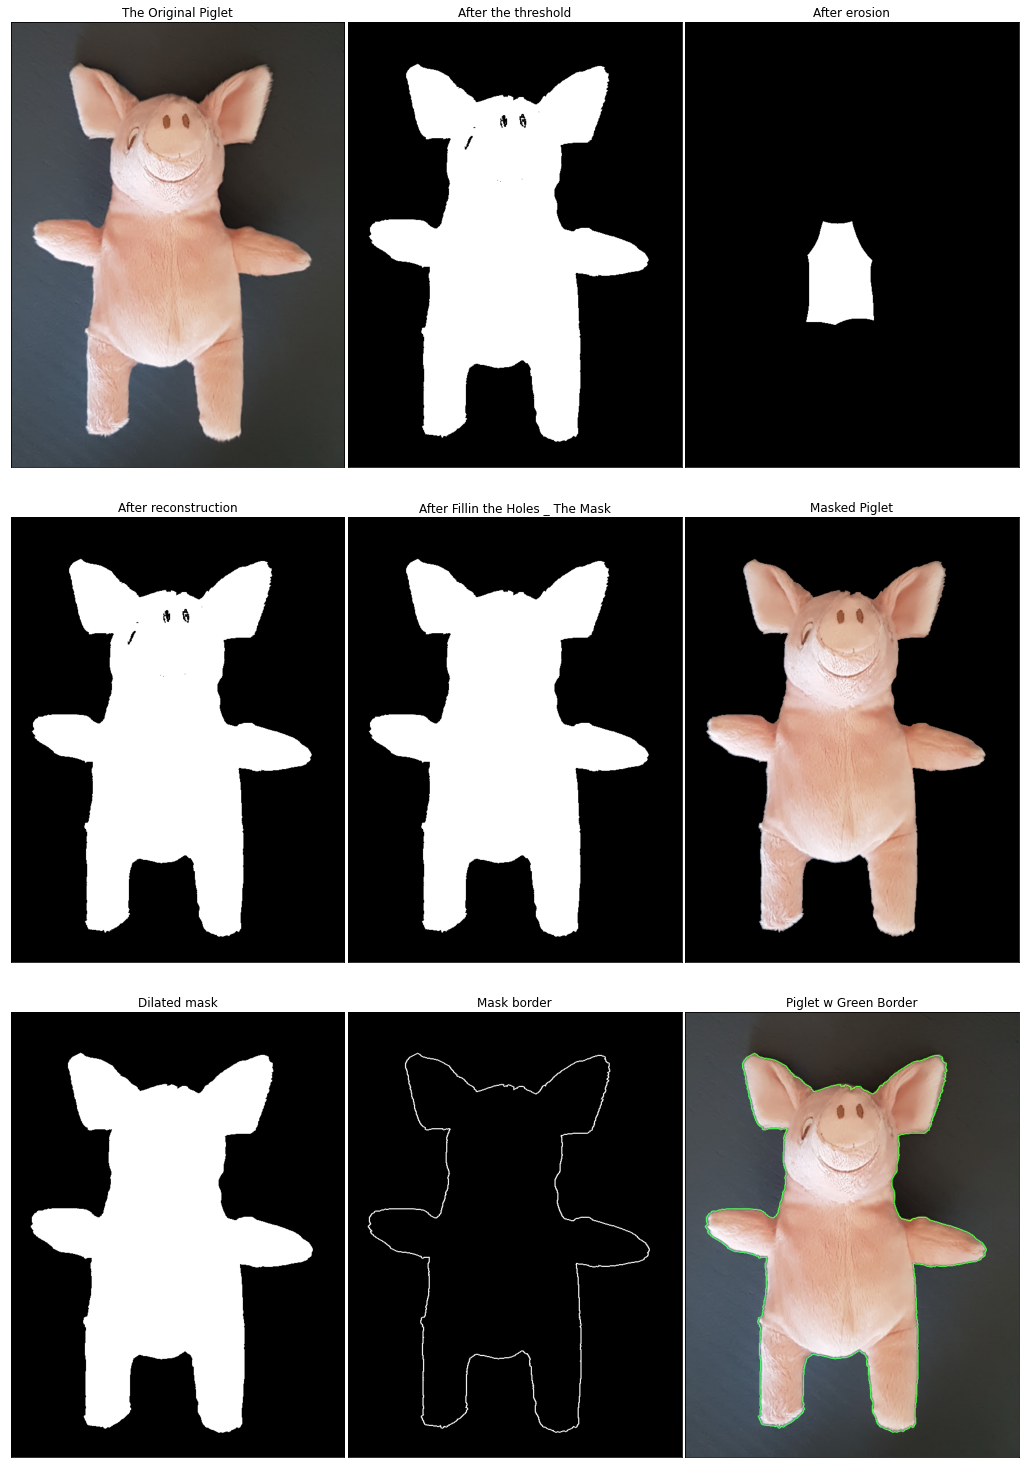

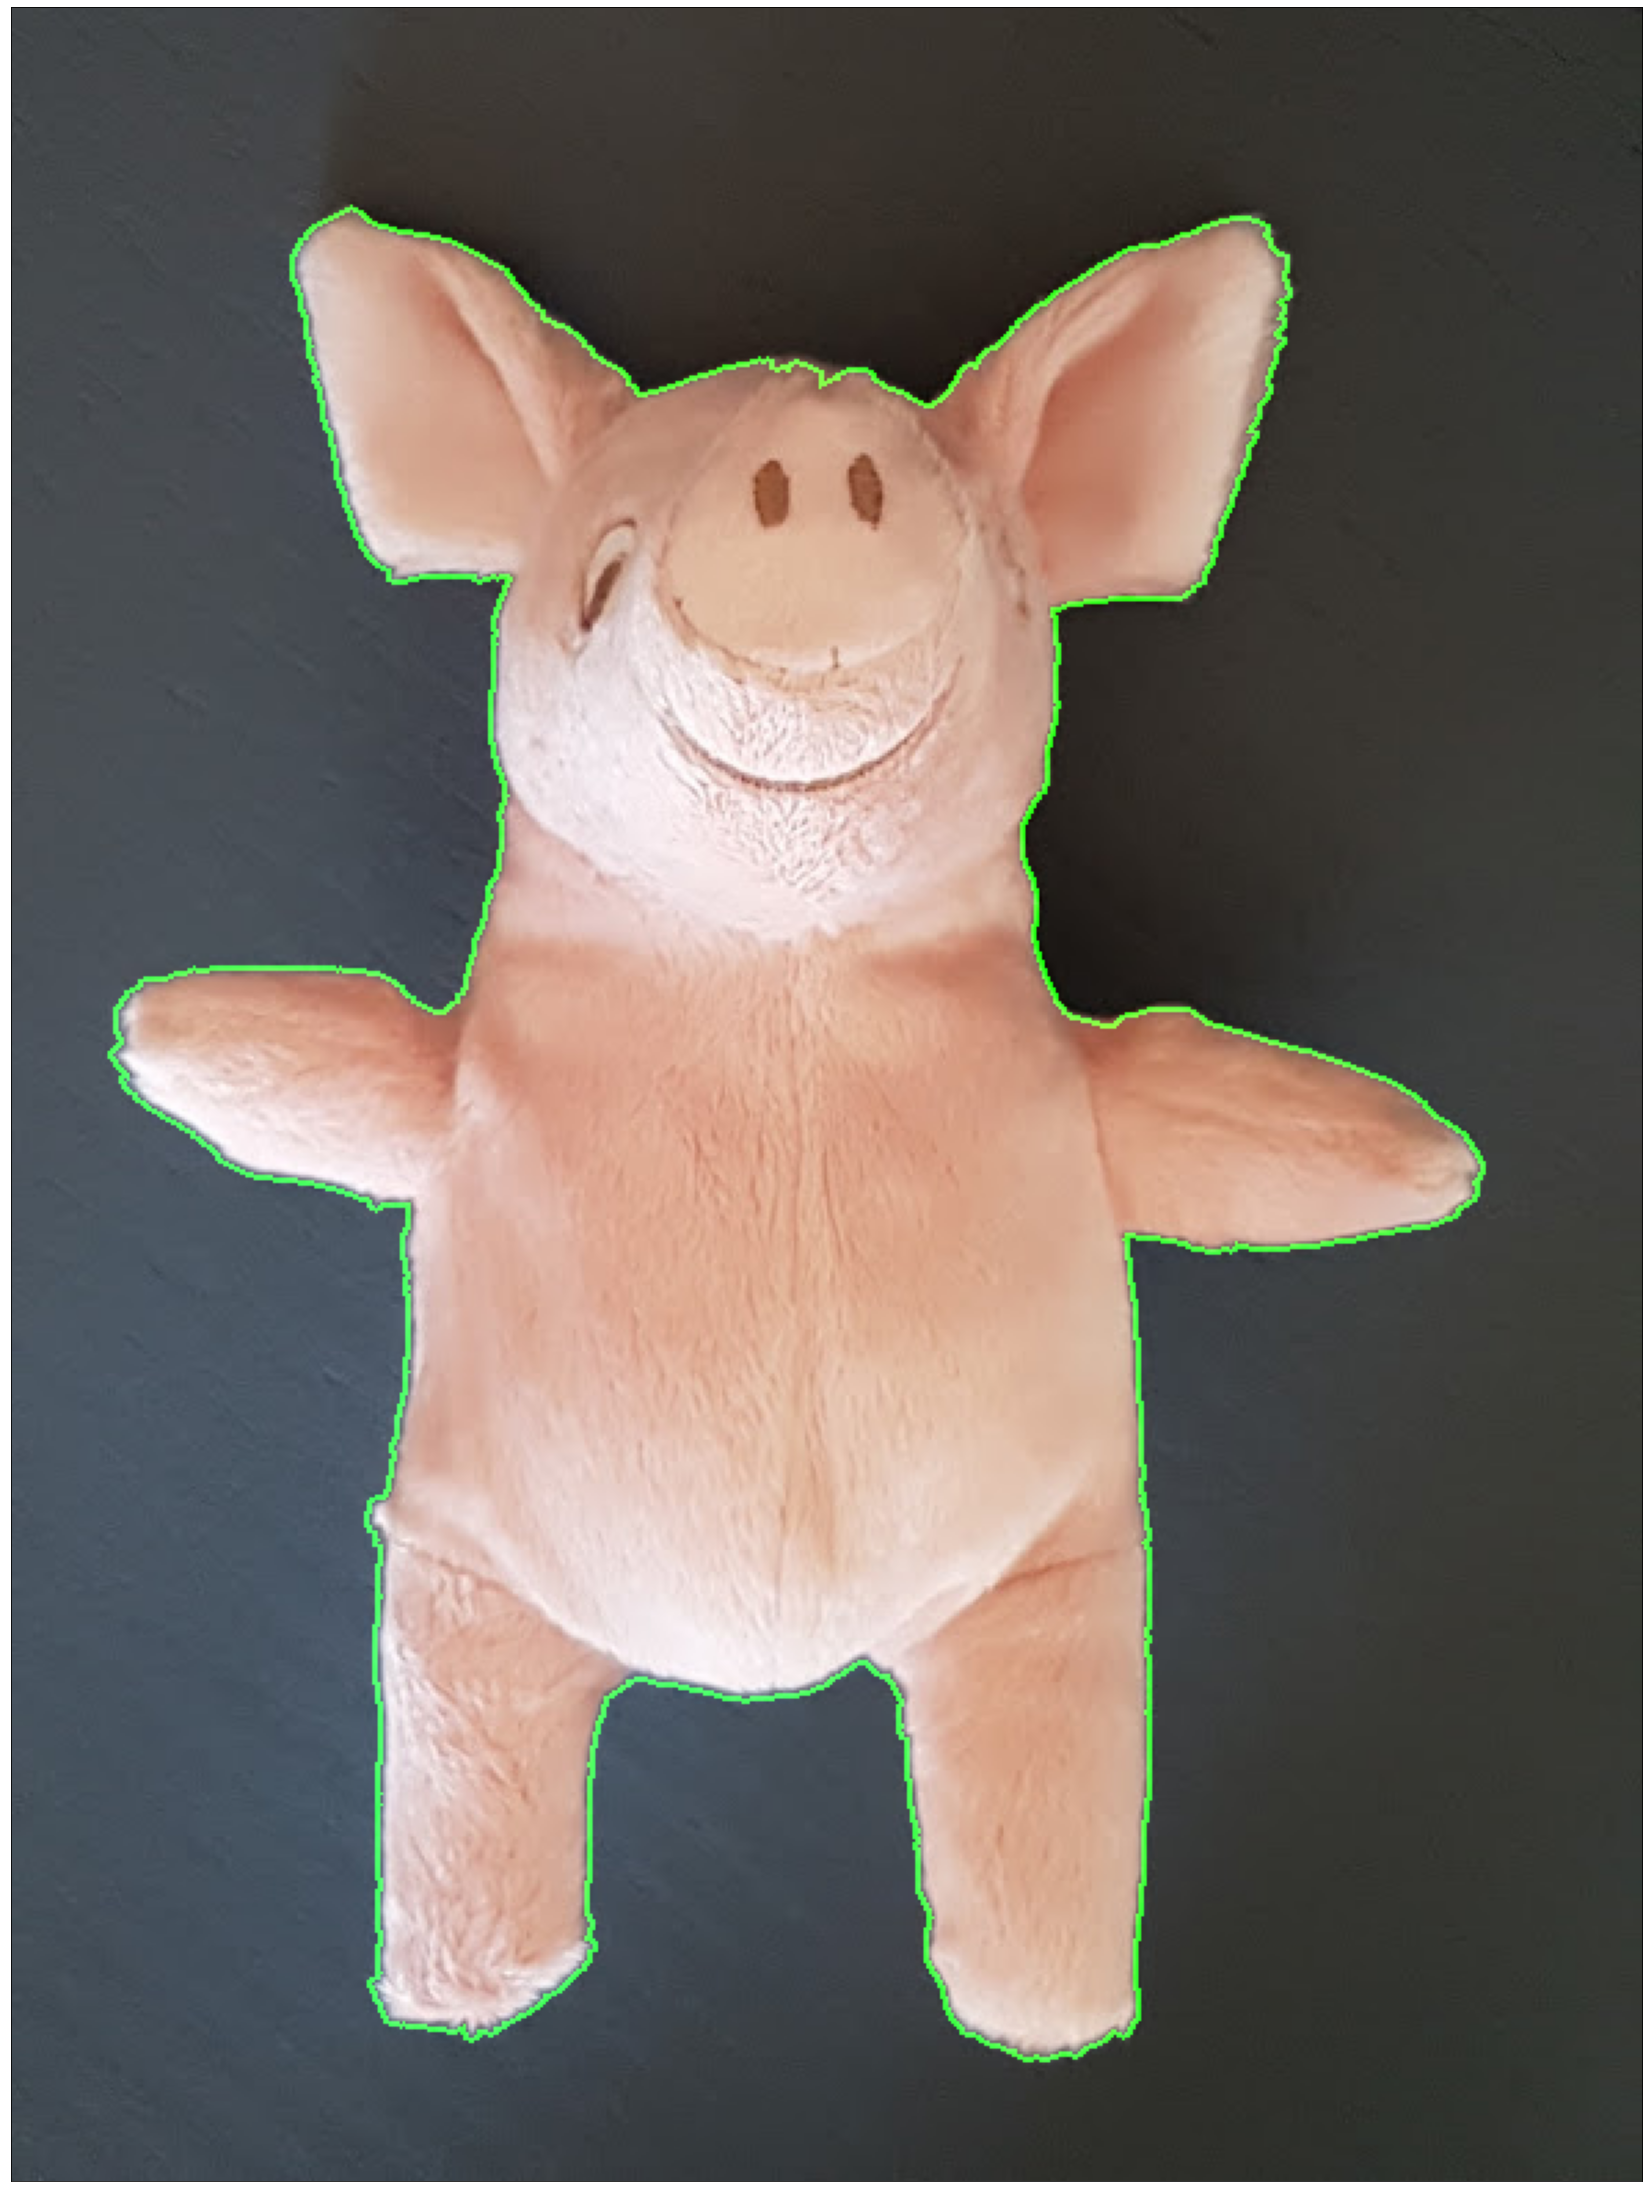

In [3]:
from skimage.morphology import disk, erosion, reconstruction
from skimage.util import img_as_ubyte
from scipy import ndimage

img_piggy_black_grayscale = cv2.imread('sample_images/piggy_black.jpg', cv2.IMREAD_GRAYSCALE)

# Applying a global threshold. 100 value is set manually
ret, img1_binary = cv2.threshold(img_piggy_black_grayscale,105,255,cv2.THRESH_BINARY)

# Apply morphological operations to remove noise and fill the gaps inside the piglet
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(150,150))
img1_eroded = cv2.morphologyEx(img1_binary, cv2.MORPH_ERODE, strel)
# img1_opened = cv2.morphologyEx(img1_binary, cv2.MORPH_OPEN, strel)
# img1_closed = cv2.morphologyEx(img1_binary, cv2.MORPH_CLOSE, strel)

# skimage strel
skimage_strel = disk(5)
img1_noise_removed = reconstruction(img1_eroded, img1_binary, method='dilation', selem=skimage_strel)

# closing nose holes
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
img1_holes_filled = np.uint8(ndimage.binary_fill_holes(img1_noise_removed)*255)
#img1_closed = cv2.morphologyEx(img1_noise_removed, cv2.MORPH_CLOSE, strel)


# convert skimage to cv2
#tmp = exposure.rescale_intensity(img1_closed, out_range=(-1, 1))
#mask = img_as_ubyte(tmp)
mask = img1_holes_filled

# Apply the mask
img1_masked = cv2.bitwise_and(img_piggy_black, img_piggy_black, mask = mask)

# Extract the border
# My approach: I will first enlarge the mask 5 pixel then extract it from itself. 
# Then I will use this thick border to draw green border around the piglet
# 1 Enlarge the mask
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
mask_dilated = cv2.morphologyEx(mask, cv2.MORPH_DILATE, strel)
mask_border = cv2.bitwise_not(mask, mask=mask_dilated)


zeros = np.zeros_like(mask_border)
green_border = np.stack((zeros,mask_border,zeros),axis=2)

piglet_w_green_border = cv2.add(green_border,img_piggy_black) 

# Plot the results
fig, axarr =  plt.subplots(3,3,figsize=(20, 25))
plt.setp(axarr, xticks=[], yticks=[])
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.1)
axarr[0,0].imshow(img_piggy_black)
axarr[0,0].set_title('The Original Piglet')
axarr[0,1].imshow(img1_binary)
axarr[0,1].set_title('After the threshold')
#axarr[0,2].imshow(img1_opened)
#axarr[0,2].set_title('After opening')
axarr[0,2].imshow(img1_eroded)
axarr[0,2].set_title('After erosion')
axarr[1,0].imshow(img1_noise_removed)
axarr[1,0].set_title('After reconstruction')
axarr[1,1].imshow(img1_holes_filled)
axarr[1,1].set_title('After Fillin the Holes _ The Mask')
axarr[1,2].imshow(img1_masked)
axarr[1,2].set_title('Masked Piglet')
axarr[2,0].imshow(mask_dilated)
axarr[2,0].set_title('Dilated mask');
axarr[2,1].imshow(mask_border)
axarr[2,1].set_title('Mask border');
axarr[2,2].imshow(piglet_w_green_border)
axarr[2,2].set_title('Piglet w Green Border');

plt.figure(figsize=(40,40))
plt.setp(matplotlib.pyplot.gcf().gca(), xticks=[], yticks=[])
plt.imshow(piglet_w_green_border);

## Question 1
Repeat the Question 0 for image "piggy **carpet**"

## Question 2
Count the number of coins in "Coins 2" image. 

In [4]:
import math
def plot_image_array(img_list, img_titles, figsize=(15,25)):
    list_length = len(img_list)
    col = 3
    row = math.floor((list_length-1)/3) + 1
    
    
    # Plot the results
    fig, axarr =  plt.subplots(row, col,figsize=figsize)
    plt.setp(axarr, xticks=[], yticks=[])
    plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.1)
    for index in range(0, list_length ):
        idx_row = math.floor(index/3)
        idx_col = index % 3
        if row == 1:
            ax = axarr[idx_col]
        else:
            ax = axarr[idx_row,idx_col]
        ax.imshow(img_list[index])
        ax.set_title(img_titles[index])

Number of coins:  9


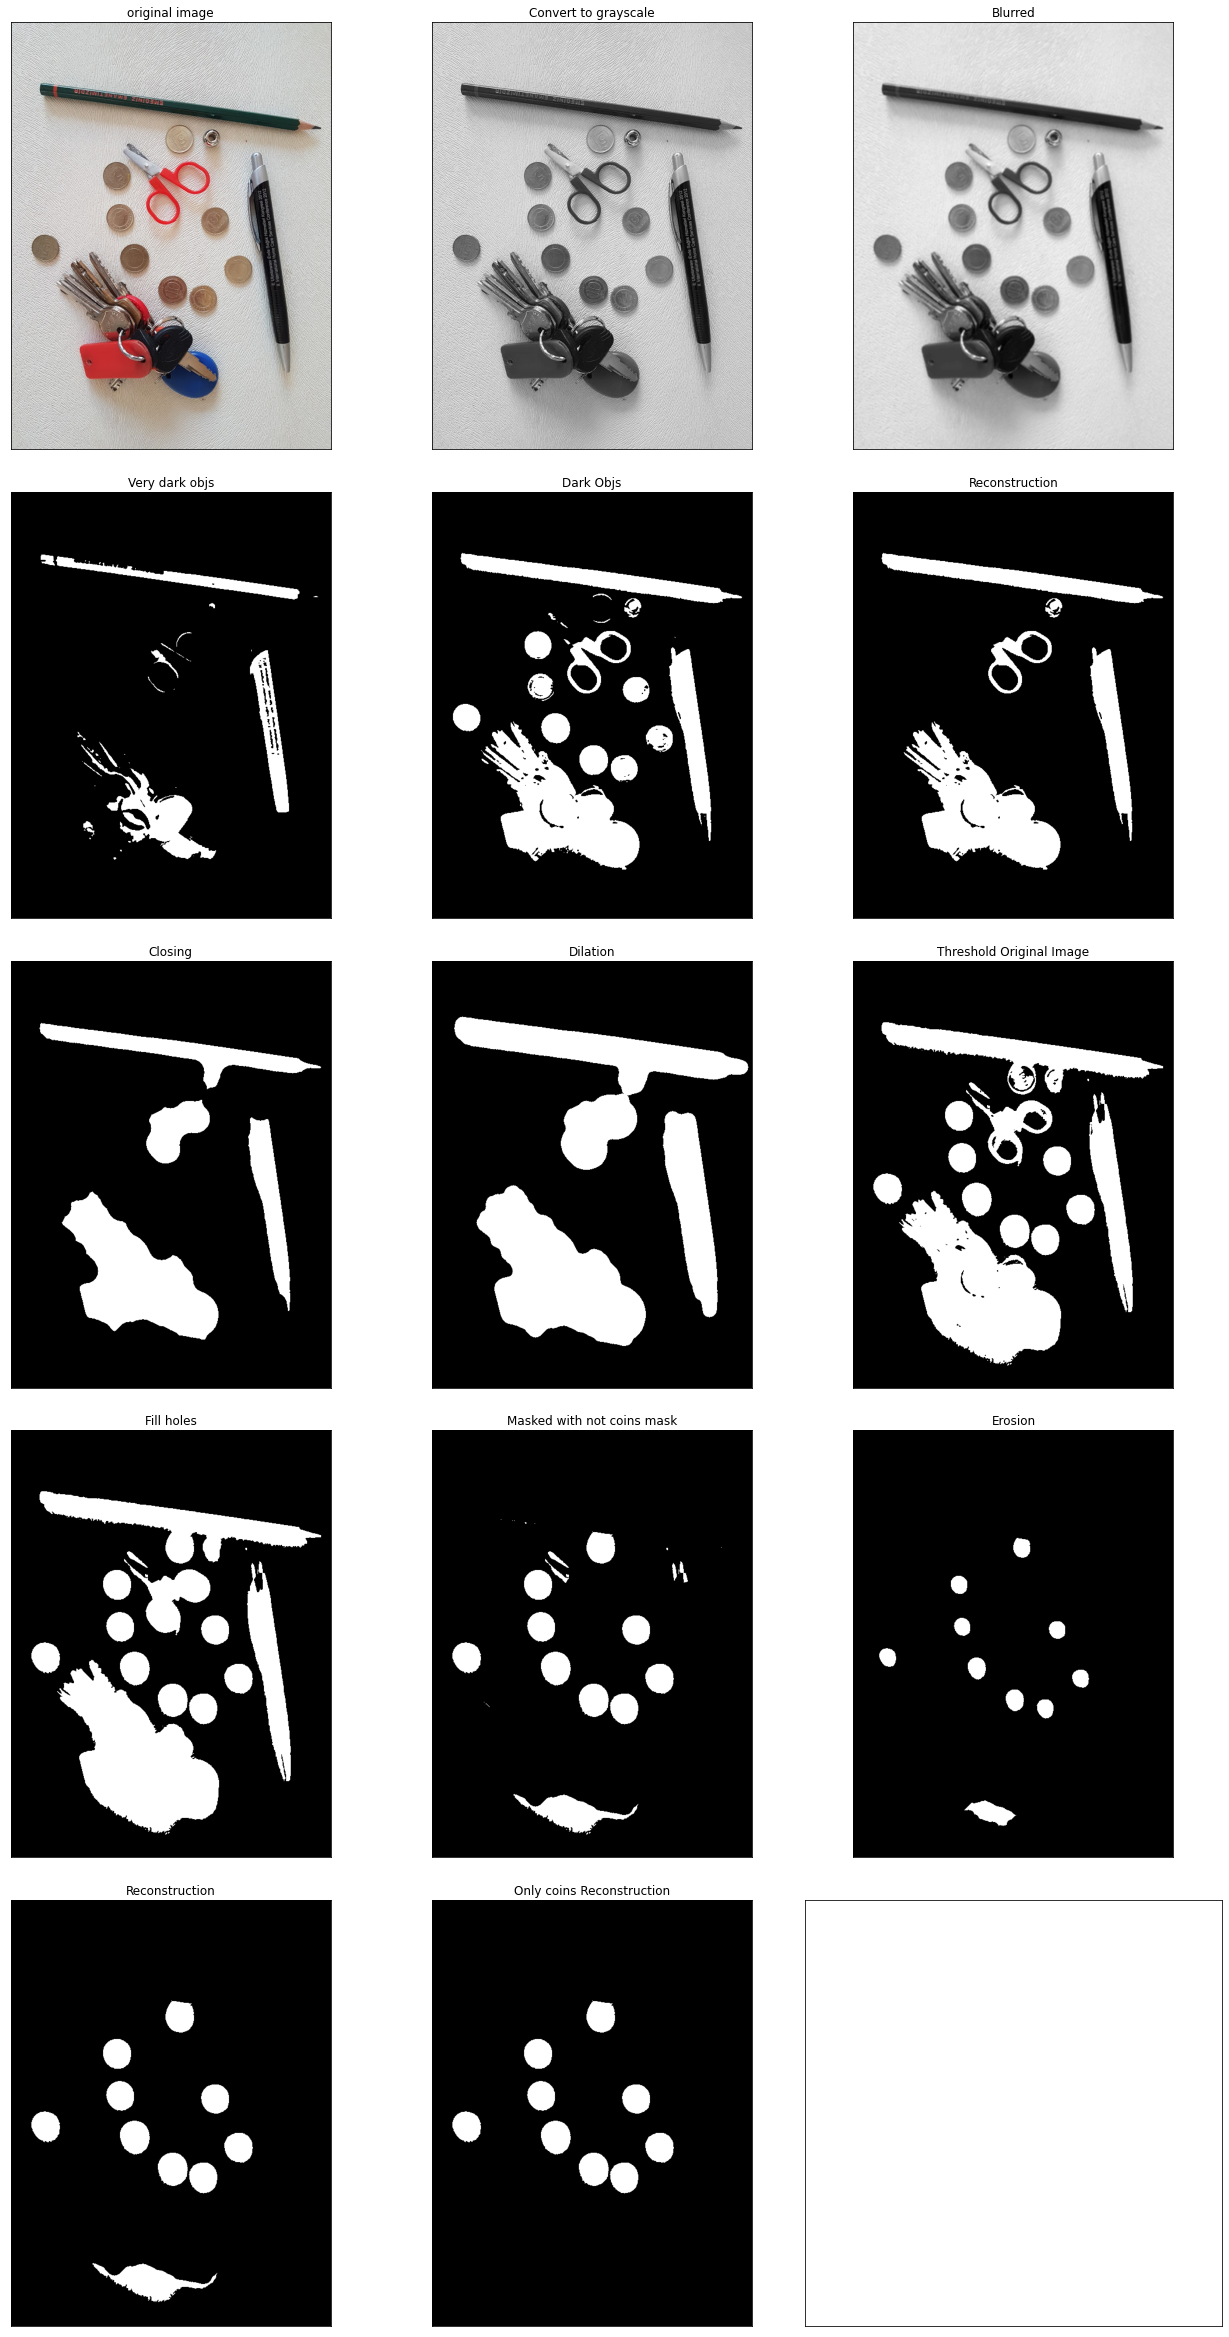

In [5]:
from skimage.morphology import disk, erosion, reconstruction
from skimage.util import img_as_ubyte
from scipy import ndimage

img_list = []
img_titles = []

img_coins_2 = cv2.imread('sample_images/coins_2.jpg')[...,::-1]
img_list.append(img_coins_2)
img_titles.append("original image")

img_coins_2_gray = cv2.cvtColor(img_coins_2, cv2.COLOR_BGR2GRAY)
img_list.append(img_coins_2_gray)
img_titles.append("Convert to grayscale")

# Blur
#img_coins_2_gray = skimage.filters.gaussian(
#    img_coins_2_gray, sigma=(1, 1), truncate=3.5, multichannel=False)
img_coins_2_blur = cv2.GaussianBlur(img_coins_2_gray,(5,5),0)
img_list.append(img_coins_2_blur)
img_titles.append("Blurred")

ret, binary_very_dark_objs = cv2.threshold(img_coins_2_blur, 60, 255,cv2.THRESH_BINARY_INV)
img_list.append(binary_very_dark_objs)
img_titles.append("Very dark objs")

ret, binary_dark_objs = cv2.threshold(img_coins_2_blur, 130, 255,cv2.THRESH_BINARY_INV)
img_list.append(binary_dark_objs)
img_titles.append("Dark Objs")

not_coins_mask = skimage.morphology.reconstruction(binary_very_dark_objs, binary_dark_objs, method='dilation')
img_list.append(not_coins_mask)
img_titles.append("Reconstruction")

not_coins_mask = skimage.morphology.binary_closing(not_coins_mask, skimage.morphology.disk(20))
img_list.append(not_coins_mask)
img_titles.append("Closing")

not_coins_mask_dilated = skimage.morphology.binary_dilation(not_coins_mask, skimage.morphology.disk(11))
img_list.append(not_coins_mask_dilated)
img_titles.append("Dilation")


ret, binary_coins = cv2.threshold(img_coins_2_blur, 160, 255,cv2.THRESH_BINARY_INV)
img_list.append(binary_coins)
img_titles.append("Threshold Original Image")

binary_coins_no_holes = np.uint8(ndimage.binary_fill_holes(binary_coins)*255)
img_list.append(binary_coins_no_holes)
img_titles.append("Fill holes")

masked_coins = binary_coins_no_holes*np.bitwise_not(not_coins_mask_dilated)
img_list.append(masked_coins)
img_titles.append("Masked with not coins mask")


# Coin size is around 25 disk. Eliminate objects larger than coin
masked_coins_eroded = skimage.morphology.binary_erosion(masked_coins, skimage.morphology.disk(10))
img_list.append(masked_coins_eroded)
img_titles.append("Erosion")

coins_reconstructed = skimage.morphology.reconstruction(masked_coins_eroded, masked_coins, method='dilation')
img_list.append(coins_reconstructed)
img_titles.append("Reconstruction")

label_img = skimage.measure.label(coins_reconstructed)

props = skimage.measure.regionprops(label_img)

areas = np.array([])

for prop in props:
    areas= np.append(areas, prop.area)

num_of_coins = np.size(np.where(areas < 2500))
print("Number of coins: ",num_of_coins)

only_coins_seed = np.zeros_like(coins_reconstructed)
for prop in props:
    if prop.area < 2500:
        coin_center = prop.centroid
        coin_center_x = int(coin_center[0])
        coin_center_y = int(coin_center[1])
        only_coins_seed[coin_center_x, coin_center_y] = 1
only_coins_seed[201, 289] = 1    
only_coins_reconstructed = skimage.morphology.reconstruction(only_coins_seed, coins_reconstructed, method='dilation')
img_list.append(only_coins_reconstructed)
img_titles.append("Only coins Reconstruction")


plot_image_array(img_list, img_titles, figsize=(25,40))

## Question 3
Write a python function which takes a maze as input and finds it's enterance and exit points. Show the output on the image. Use the given 3 maze images to show your result.

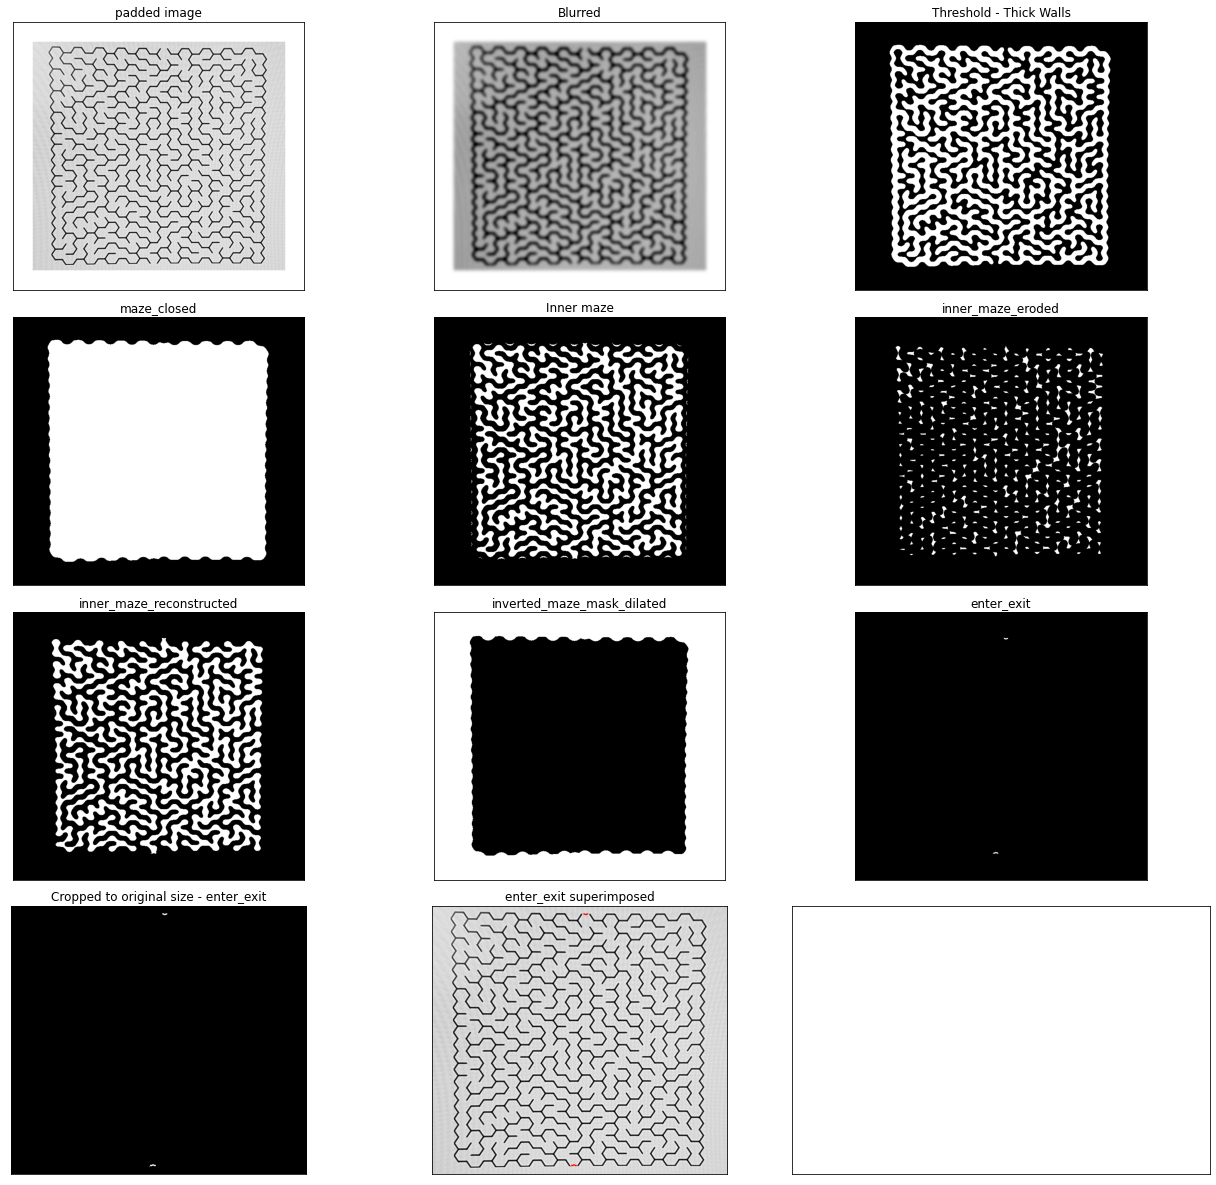

In [37]:

def find_enter_exit(img_maze, plot=True):
    img_list = []
    img_titles = []
    padding = 50
    
    padded_maze = cv2.copyMakeBorder(img_maze,padding,padding,padding,padding,cv2.BORDER_CONSTANT,value=255)
    img_list.append(padded_maze)
    img_titles.append("padded image")

    maze_blur = cv2.GaussianBlur(padded_maze,(25,25),0)
    img_list.append(maze_blur)
    img_titles.append("Blurred")

    ret, binary_maze_thick_walls = cv2.threshold(maze_blur, 200, 255,cv2.THRESH_BINARY_INV)
    img_list.append(binary_maze_thick_walls)
    img_titles.append("Threshold - Thick Walls")

    maze_closed = skimage.morphology.binary_closing(binary_maze_thick_walls, skimage.morphology.disk(15))
    img_list.append(maze_closed)
    img_titles.append("maze_closed")

    inner_maze = maze_closed*np.bitwise_not(binary_maze_thick_walls)
    img_list.append(inner_maze)
    img_titles.append("Inner maze")

    inner_maze_eroded = skimage.morphology.binary_erosion(inner_maze, skimage.morphology.disk(5))
    img_list.append(inner_maze_eroded)
    img_titles.append("inner_maze_eroded")

    inner_maze_reconstructed = skimage.morphology.reconstruction(inner_maze_eroded, inner_maze, method='dilation')
    img_list.append(inner_maze_reconstructed)
    img_titles.append("inner_maze_reconstructed")

    inverted_maze_mask_dilated = skimage.morphology.binary_dilation(np.bitwise_not(maze_closed), skimage.morphology.disk(3))
    img_list.append(inverted_maze_mask_dilated)
    img_titles.append("inverted_maze_mask_dilated")

    enter_exit = inner_maze_reconstructed*inverted_maze_mask_dilated
    img_list.append(enter_exit)
    img_titles.append("enter_exit")
    
    crop_to_original_size = enter_exit[padding:-padding, padding:-padding]
    img_list.append(crop_to_original_size)
    img_titles.append("Cropped to original size - enter_exit")
    
    backtorgb = cv2.cvtColor(img_maze,cv2.COLOR_GRAY2RGB) 
    backtorgb[crop_to_original_size>0.5,0] = 255 
    backtorgb[crop_to_original_size>0.5,1] = 0 
    backtorgb[crop_to_original_size>0.5,2] = 0 
    img_list.append(backtorgb)
    img_titles.append("enter_exit superimposed")
    
    if plot:
        plot_image_array(img_list, img_titles, figsize=(25,20))
    return crop_to_original_size

img_maze_1 = cv2.imread('sample_images/maze_1.jpg', cv2.IMREAD_GRAYSCALE)[...,::-1]
find_enter_exit(img_maze_1);


## Question 4
Write a **python function** which takes a maze image as argument and solves the maze, superimposes the result on the maze to show the solution. You can use the function you wrote in the previous question to find the entering and exit points of the maze. Use the given 3 maze images to show your result.

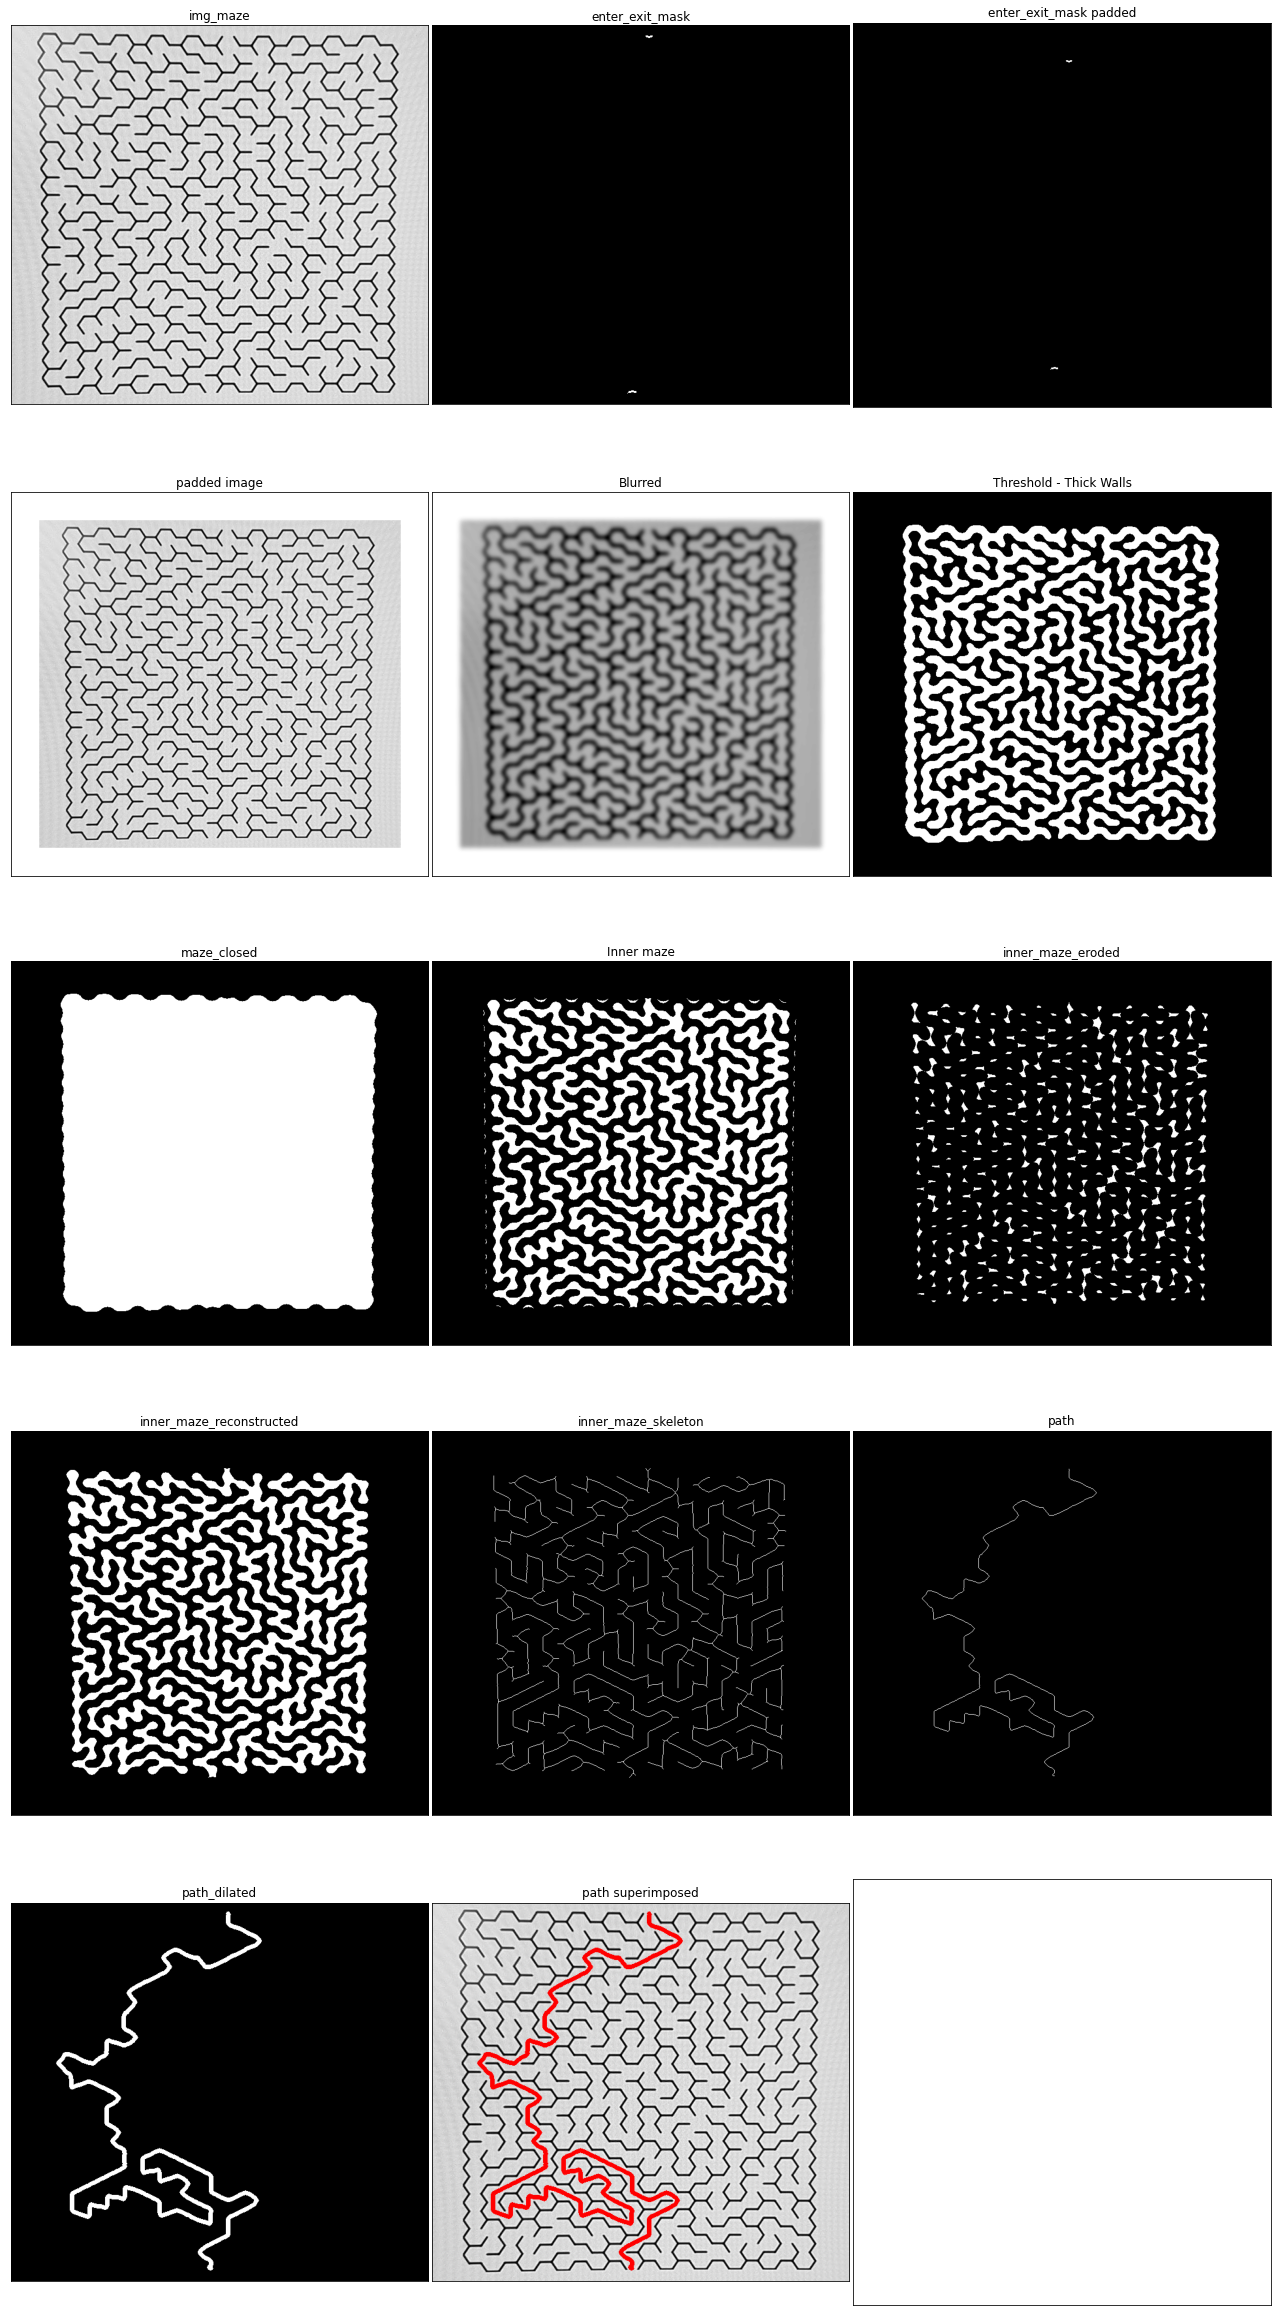

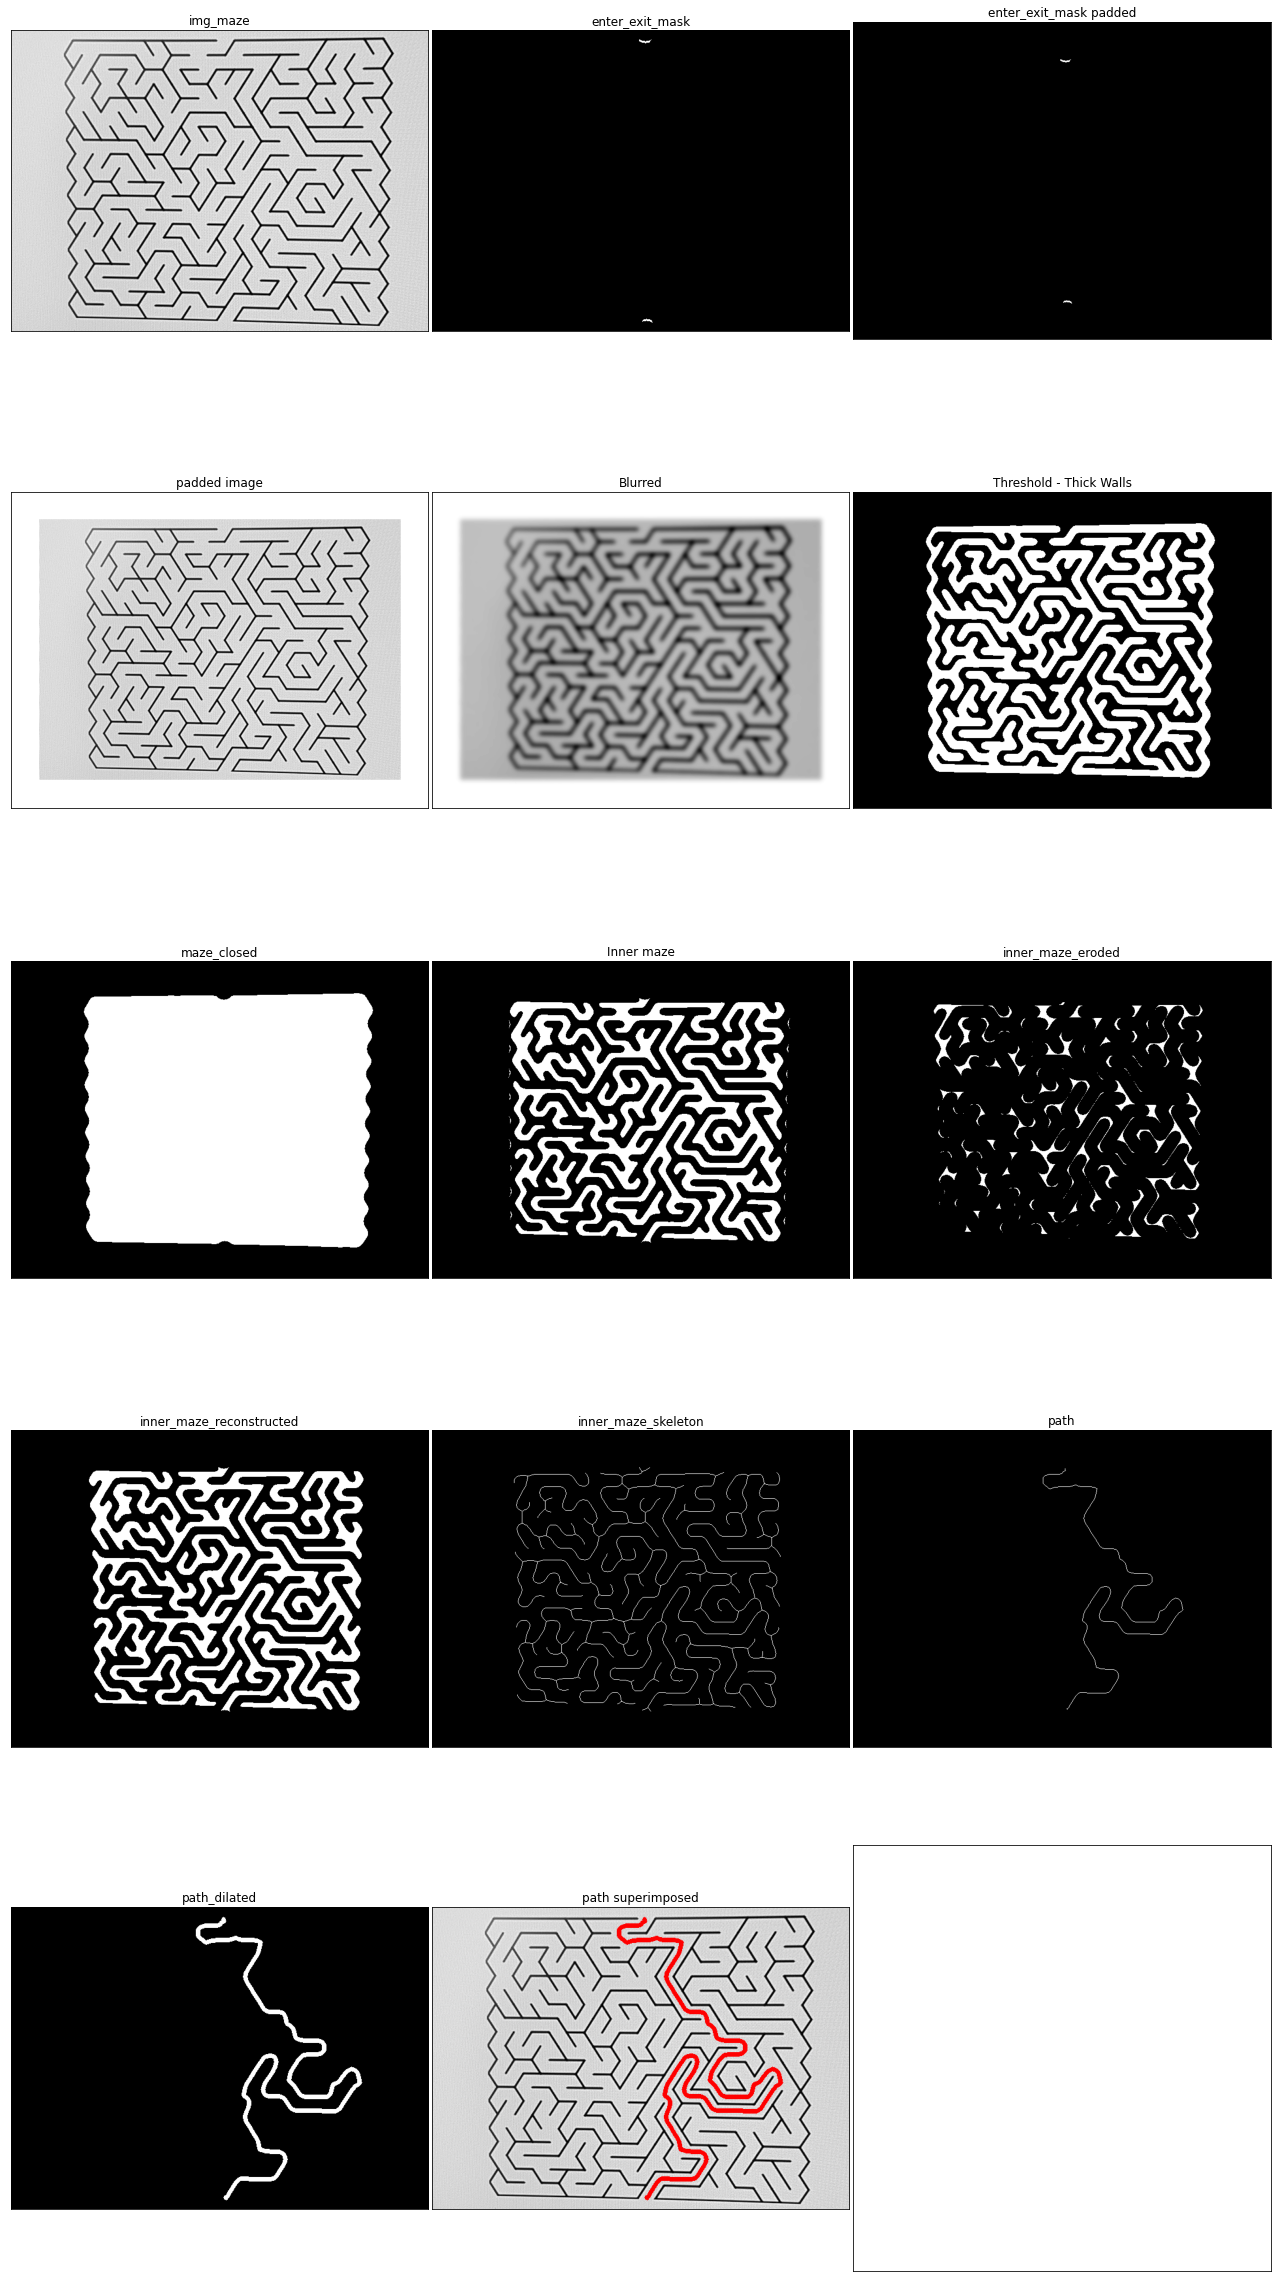

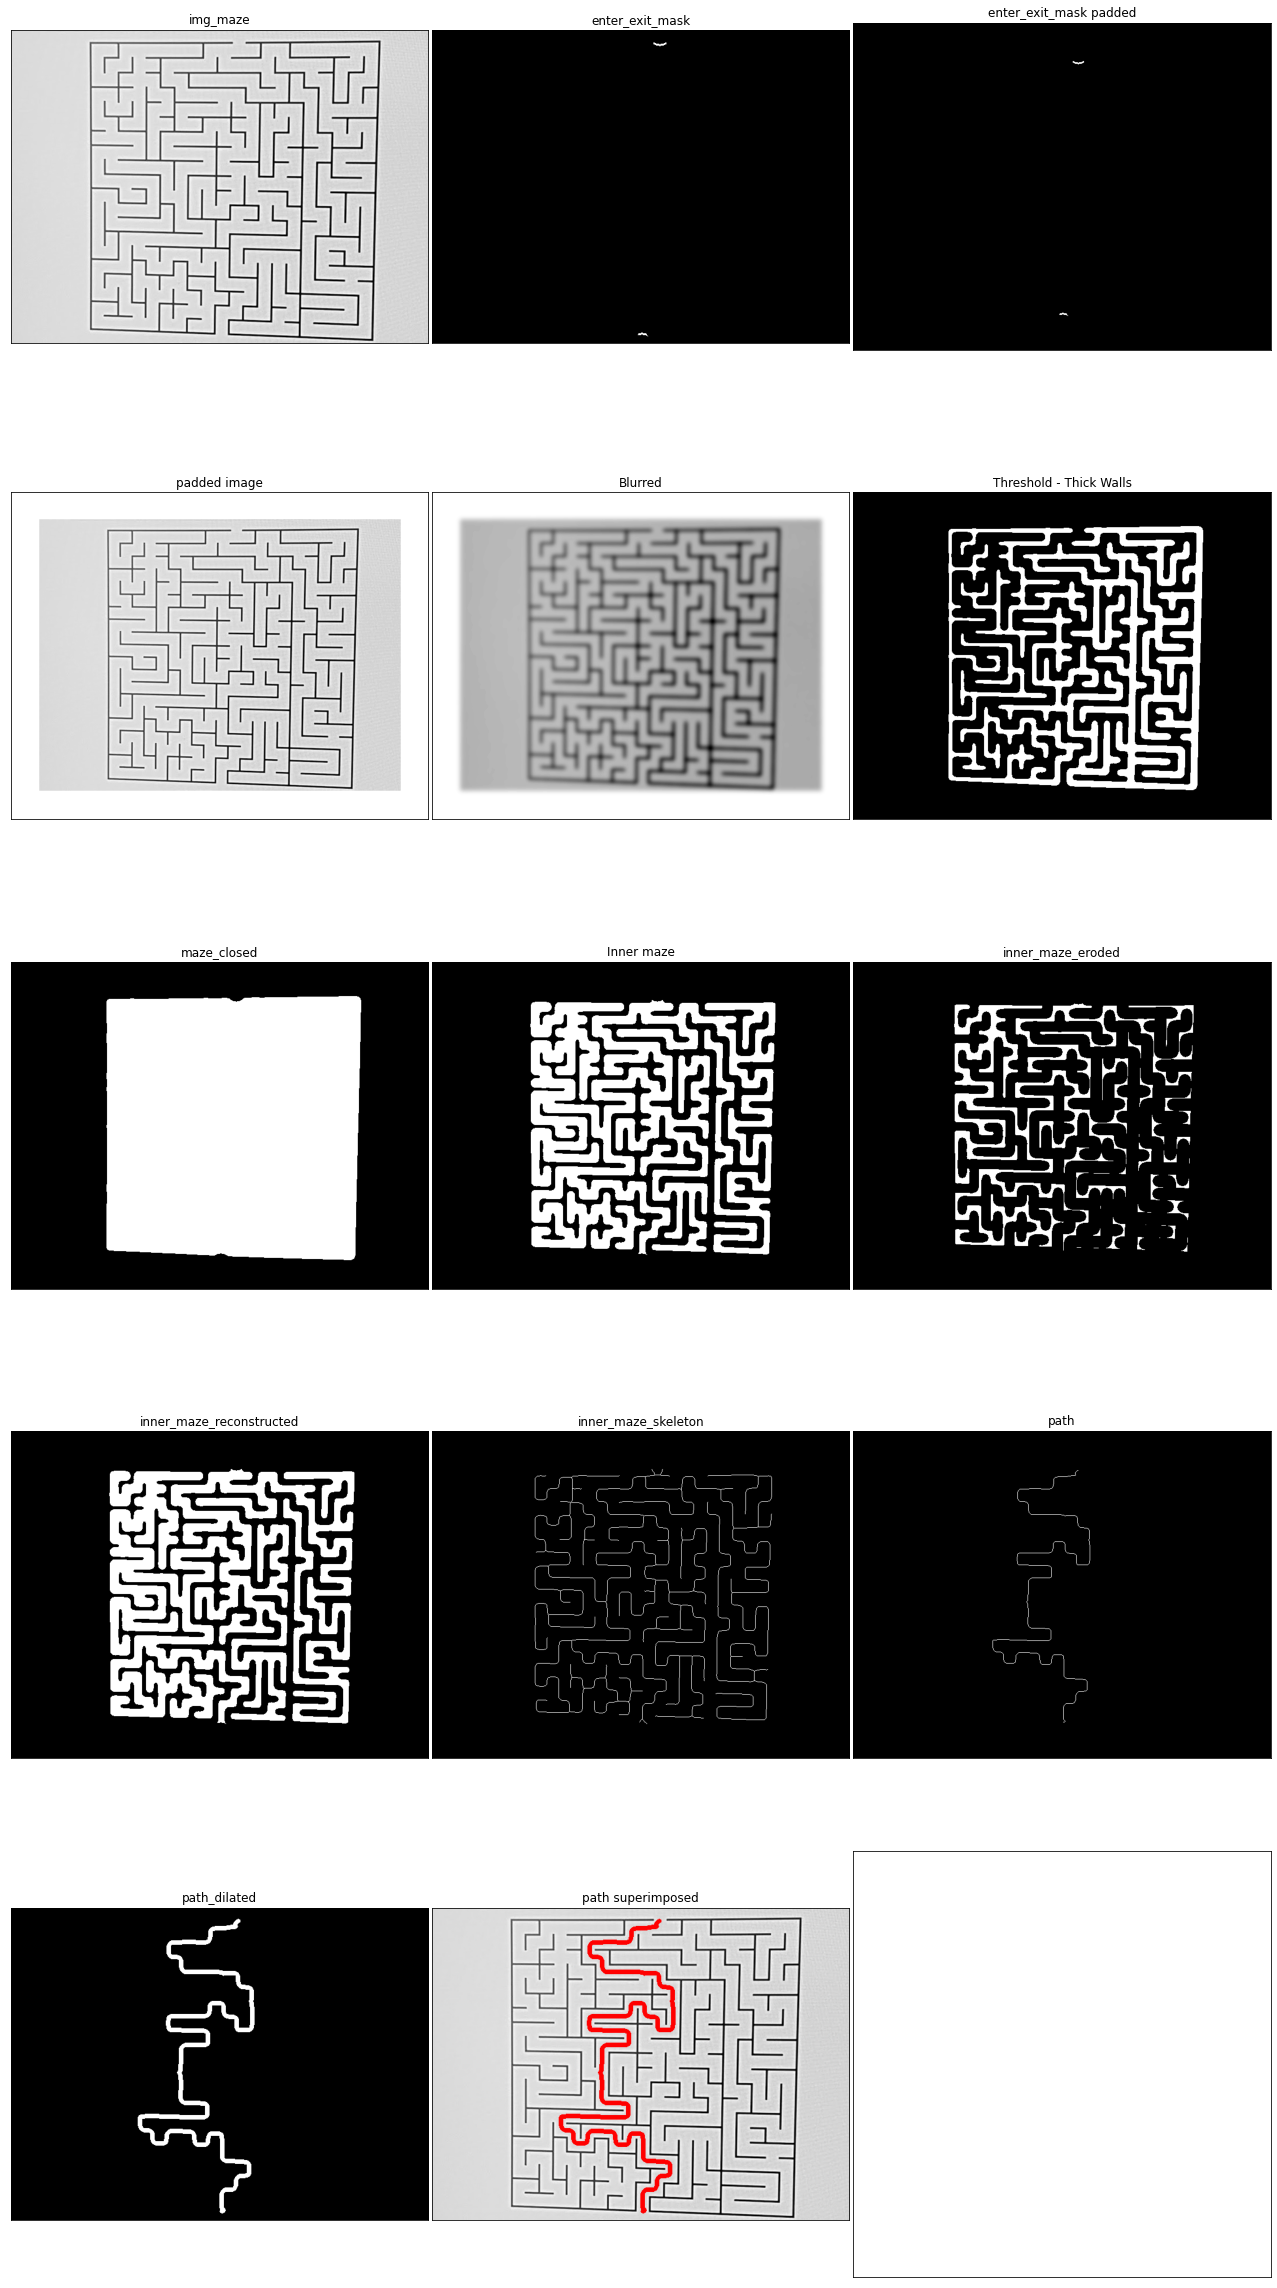

In [41]:
from skimage.graph import route_through_array
def solve_maze(img_maze, plot=True):
    img_list = []
    img_titles = []
    padding=50

    img_list.append(img_maze)
    img_titles.append("img_maze")

    enter_exit_mask = find_enter_exit(img_maze, plot=False);
    img_list.append(enter_exit_mask)
    img_titles.append("enter_exit_mask")

    enter_exit_mask_padded = cv2.copyMakeBorder(enter_exit_mask,padding,padding,padding,padding,cv2.BORDER_CONSTANT,value=0)
    img_list.append(enter_exit_mask_padded)
    img_titles.append("enter_exit_mask padded")


    padded_maze = cv2.copyMakeBorder(img_maze,padding,padding,padding,padding,cv2.BORDER_CONSTANT,value=255)
    img_list.append(padded_maze)
    img_titles.append("padded image")

    maze_blur = cv2.GaussianBlur(padded_maze,(25,25),0)
    img_list.append(maze_blur)
    img_titles.append("Blurred")

    ret, binary_maze_thick_walls = cv2.threshold(maze_blur, 200, 255,cv2.THRESH_BINARY_INV)
    img_list.append(binary_maze_thick_walls)
    img_titles.append("Threshold - Thick Walls")

    maze_closed = skimage.morphology.binary_closing(binary_maze_thick_walls, skimage.morphology.disk(15))
    img_list.append(maze_closed)
    img_titles.append("maze_closed")

    inner_maze = maze_closed*np.bitwise_not(binary_maze_thick_walls)
    img_list.append(inner_maze)
    img_titles.append("Inner maze")

    inner_maze_eroded = skimage.morphology.binary_erosion(inner_maze, skimage.morphology.disk(5))
    img_list.append(inner_maze_eroded)
    img_titles.append("inner_maze_eroded")

    inner_maze_reconstructed = skimage.morphology.reconstruction(inner_maze_eroded, inner_maze, method='dilation')
    img_list.append(inner_maze_reconstructed)
    img_titles.append("inner_maze_reconstructed")

    inner_maze_skeleton = skimage.morphology.skeletonize(inner_maze_reconstructed)
    img_list.append(inner_maze_skeleton)
    img_titles.append("inner_maze_skeleton")

    label_img = skimage.measure.label(enter_exit_mask_padded)
    regions = skimage.measure.regionprops(label_img)

    x, y = regions[0].centroid
    start_x, start_y = int(x),int(y)
    x, y = regions[1].centroid
    end_x, end_y = int(x),int(y)

    indices, weight = skimage.graph.route_through_array(np.logical_not(inner_maze_skeleton)*10000+1, [start_x, start_y], [end_x, end_y], fully_connected=True)
    indices = np.array(indices).T
    path = np.zeros_like(enter_exit_mask_padded)
    path[indices[0], indices[1]] = 1
    img_list.append(path)
    img_titles.append("path")

    croped_path = path[padding:-padding, padding:-padding]
    croped_path_dilated = skimage.morphology.binary_dilation(croped_path, skimage.morphology.disk(3))
    img_list.append(croped_path_dilated)
    img_titles.append("path_dilated")

    backtorgb = cv2.cvtColor(img_maze,cv2.COLOR_GRAY2RGB) 
    backtorgb[croped_path_dilated>0.5,0] = 255 
    backtorgb[croped_path_dilated>0.5,1] = 0 
    backtorgb[croped_path_dilated>0.5,2] = 0 
    img_list.append(backtorgb)
    img_titles.append("path superimposed")
    if plot:
        plot_image_array(img_list, img_titles, figsize=(25,40))


img_maze = cv2.imread('sample_images/maze_1.jpg', cv2.IMREAD_GRAYSCALE)[...,::-1]
solve_maze(img_maze)
img_maze = cv2.imread('sample_images/maze_2.jpg', cv2.IMREAD_GRAYSCALE)[...,::-1]
solve_maze(img_maze)
img_maze = cv2.imread('sample_images/maze_3.jpg', cv2.IMREAD_GRAYSCALE)[...,::-1]
solve_maze(img_maze)

In [17]:
label_img = skimage.measure.label(enter_exit_mask_padded)
regions = skimage.measure.regionprops(label_img)

x, y = regions[0].centroid
start_x, start_y = int(x),int(y)
x, y = regions[1].centroid
end_x, end_y = int(x),int(y)
print (start_x, start_y)
print (end_x, end_y)

indices, weight = skimage.graph.route_through_array(enter_exit_mask_padded, [start_x, start_y], [end_x, end_y], fully_connected=False)
indices = np.array(indices).T
path = np.zeros_like(enter_exit_mask_padded)
path[indices[0], indices[1]] = 1


67 382
611 356


In [24]:
np.amax(enter_exit_mask_padded*254+1)

255.0

## Question 5
a) Find the edges of coins 1 image using **Sobel** filter. Show your result.  
b) Apply a blurring filter to coins 1 image and than repeat a). Show your result and discuss what happens if you apply edge finding after blurring.
c) Apply a grayscale morphological closing to eliminate the nose and eye holes of the piglet in Piggy black image.